# SWIGGY DATASET 
## Data Aanalysis with Python FINAL PROJECT 
### Made by:
- Vishvesh K Shrivatsav
- Tanisha Savitha Naik
- Srushti R Madalgi
- T Nihal

## STEP 0:

## Selceting the right Dataset and Importing the required Libraries for this project.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



### Reading the csv file and displaying the values.

In [3]:
df=pd.read_csv("swiggy.csv")
print(df.head())

    ID         Area       City         Restaurant  Price  Avg ratings  \
0  211  Koramangala  Bangalore        Tandoor Hut  300.0          4.4   
1  221  Koramangala  Bangalore      Tunday Kababi  300.0          4.1   
2  246    Jogupalya  Bangalore            Kim Lee  650.0          4.4   
3  248  Indiranagar  Bangalore  New Punjabi Hotel  250.0          3.9   
4  249  Indiranagar  Bangalore                Nh8  350.0          4.0   

   Total ratings                                          Food type  \
0          100.0          Biryani,Chinese,North Indian,South Indian   
1            NaN                                   Mughlai,Lucknowi   
2          100.0                                            Chinese   
3          500.0               North Indian,Punjabi,Tandoor,Chinese   
4           50.0  Rajasthani,Gujarati,North Indian,Snacks,Desser...   

        Address  Delivery time  
0     5Th Block           59.0  
1     5Th Block           56.0  
2   Double Road           50.0  
3 

## STEP 1:
##  DATA  PRE-PROCESSING.

### Step 1.1
### Checking if there are null values in the dataset.

In [4]:
df.isna().sum()


ID                 0
Area               0
City               0
Restaurant         0
Price            169
Avg ratings      389
Total ratings    174
Food type          0
Address            0
Delivery time    284
dtype: int64

### Step 1.2
### Filling null values 

Changing all null values into the median value.

In [5]:
### Finding median values.
med_price=df["Price"].median()
med_avgrating=df["Avg ratings"].median()
med_totrating=df["Total ratings"].median()
med_delivery=df['Delivery time'].median()

### replacing null values with the median values.

df["Price"].fillna(med_price, inplace=True)
df['Avg ratings'].fillna(med_avgrating , inplace=True)
df['Delivery time'].fillna(med_delivery , inplace=True)
df['Total ratings'].fillna(med_totrating , inplace=True)

### Checking for null values.
df.isna().sum()

ID               0
Area             0
City             0
Restaurant       0
Price            0
Avg ratings      0
Total ratings    0
Food type        0
Address          0
Delivery time    0
dtype: int64

As we can see the NULL values have been filled with the median values, in the file.

## STEP 2:
## DATA VISUALIZATION

### The most key step in data visualization is selecting the right graph and the right set of Data, which is why me and my team chose line plot and scatter plot

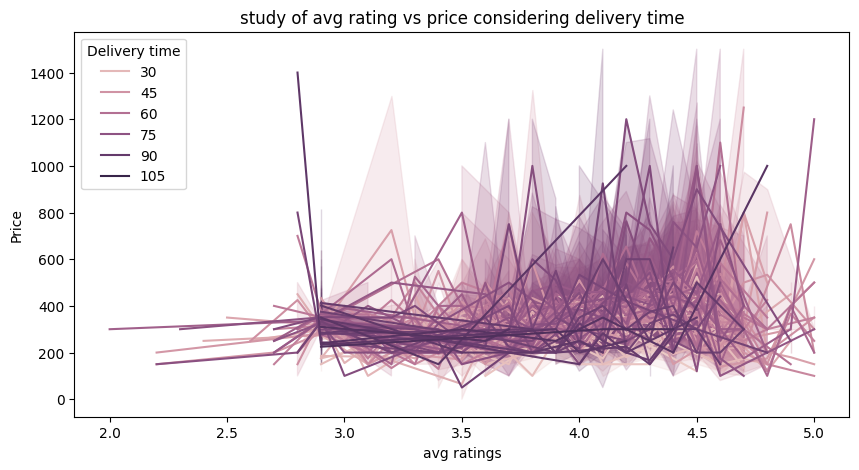

In [6]:
plt.figure(figsize=(10,5))

plt.title('study of avg rating vs price considering delivery time')
plt.xlabel('avg ratings')
plt.ylabel('Price')

sns.lineplot(data=df,x='Avg ratings',y='Price',hue='Delivery time')
plt.show()

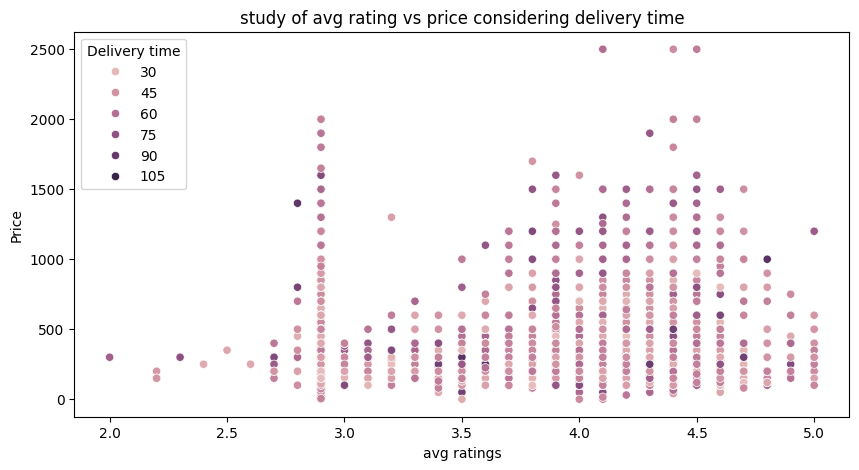

In [7]:
plt.figure(figsize=(10,5))

plt.title('study of avg rating vs price considering delivery time')
plt.xlabel('avg ratings')
plt.ylabel('Price')

sns.scatterplot(data=df,x='Avg ratings',y='Price',hue='Delivery time')
plt.show()

## As we can clearly see, there are Three clear inferences
- Restaurants that take cost very less (< 400), and take long time to deliver (> 75), have very low average rating(<3.5).
- Restuarants that cost a lot(>1000) and take long time to deliver (>75), also have very low average rating(<3.5).
- The restaurants that takes average price (>500 and <100) and takes reasonably low delivery time (<60 mintues), has high svg ratings(>4.5).

## Step 3:
## DATA ANALYSIS

### Price

In [8]:
price_mean=df['Price'].mean()
price_median=df['Price'].median()
price_variance=df['Price'].var()
price_standard_deviation=df['Price'].std()
price_skewness=df['Price'].skew()
price_kurtosis=df['Price'].kurt()
print("Mean of price=",price_mean,'\n')
print("Median of price=",price_median,'\n')
print("Variance of price=",price_variance,'\n')
print("Standard deviation of price=",price_standard_deviation,'\n')
print("Skewness of price=",price_skewness,"\n")
print("Kurtosis of price=",price_kurtosis)

Mean of price= 348.1357142857143 

Median of price= 300.0 

Variance of price= 53085.989184073216 

Standard deviation of price= 230.40396954929665 

Skewness of price= 2.644868814615327 

Kurtosis of price= 10.181449000905385


### Delivery Time

In [9]:
Delivery_time_mean=df['Delivery time'].mean()
Delivery_time_median=df['Delivery time'].median()
Delivery_time_variance=df['Delivery time'].var()
Delivery_time_standard_deviation=df['Delivery time'].std()
Delivery_time_skewness=df['Delivery time'].skew()
Delivery_time_kurtosis=df['Delivery time'].kurt()
print("Mean of Delivery time=",Delivery_time_mean,'\n')
print("Median of Delivery time=",Delivery_time_median,'\n')
print("Variance of Deliver time=",Delivery_time_variance,'\n')
print("Standard deviation of Delivery time=",Delivery_time_standard_deviation,'\n')
print("Skewness of Delivery time=",Delivery_time_skewness,"\n")
print("Kurtosis of Deliver time=",Delivery_time_kurtosis)

Mean of Delivery time= 53.93306451612903 

Median of Delivery time= 52.5 

Variance of Deliver time= 198.8859442889585 

Standard deviation of Delivery time= 14.102692802757867 

Skewness of Delivery time= 0.3913694565569032 

Kurtosis of Deliver time= -0.29314665519608685


### Average rating grouped by Cities

In [10]:

print(df.groupby(['City'])["Avg ratings"].mean(),'\n')
print(df.groupby(['City'])["Avg ratings"].median())


City
Ahmedabad    3.618131
Bangalore    3.762262
Chennai      3.781374
Delhi        3.535188
Hyderabad    3.707070
Kolkata      3.702600
Mumbai       3.610728
Pune         3.560826
Surat        3.601562
Name: Avg ratings, dtype: float64 

City
Ahmedabad    3.9
Bangalore    4.0
Chennai      4.0
Delhi        3.7
Hyderabad    3.9
Kolkata      3.9
Mumbai       3.8
Pune         3.7
Surat        3.8
Name: Avg ratings, dtype: float64


## THE COSTLIEST AND CHEAPEST CITIES TO ORDER FOOD IN

In [16]:
print("The costliest city to order food in is",df.groupby('City')["Price"].mean().idxmax())
print("The cheapest city to order food in is",df.groupby('City')["Price"].mean().idxmin())


The costliest city to order food in is Mumbai
The cheapest city to order food in is Surat


## STEP 4:
## INFERENCES

1. INFERENCE FOR THE PRICE
    - The mean price of each meal is around ₹350 and the median price is ₹300
    - The Skewness of 2.64 indicates that the highly right-skewed data
        - This signifies that the data points are concentrated to the left
        - However there are some extreme values on the right side, making it right skewed
    - The mean of price is pulled to the right compared to the median, which is very apparent

    - The Kurtosis of 10.18 signifies that it is a leptokurtic distribution.
        -  This means that there will be sharper peaks.
            - Which means that more data points are clustered around the center
            - It also means that the distribution has a narrow peak in the center
        - This also means that there are heavier tails.
            - Which means there are extreme values in the tails.
    - The standard deviation is 230.40
        - This signidies that there is a large Spread:
            - This means that the data points are dispersed over a wide range of values.
            - There's considerable variability within the dataset.

2. INFERENCE FOR THE DELIVERY TIME
    - The mean deliver time is 54 minutes(approx.) and median time is 52 minutes(approx.)
    - The Skewness of 0.4(approx.) signifies a moderately right-skewed distribution
        - This suggests a very slight asymmetry to the right
        - The tail of this dataset extends slightly more to the right
    - The kurtosis of -0.3(approx.) singnifies a platykurtic distribution. 
        - This signifies a flatter peak.
        - Lighter Tails
    - The standard deviation is 14.10.
        - This signifies a moderate spread.

3. INFERENCE FOR THE BEST CITY TO EAT FOOD IN:
    - We compared the mean and median average rating of food grouped by the city and got the following inferences
        - The top three best cities to order food is in
            1. Chennai
            2. Banglore
            3. Hyderabad
        - The worst cities to order food is in
            1. Delhi
            2. Pune
            3. Mumbai
            
4. Regarding the price of delivery
   - The cheapest food is in Surat.
   - The costliest food is in Mumbai

5. Additional Inferences:
    - Exploring the relationship between average ratings, food prices, and delivery times reveals interesting patterns. Restaurants offering a balance of reasonable prices, swift delivery, and high ratings create a sweet spot for consumers.

    - There's a noticeable correlation between lower-priced meals with longer delivery times and lower average ratings, suggesting a potential area for improvement for such restaurants.


## Conclusion
In conclusion, our analysis of the Swiggy dataset provides valuable insights into the dynamics of the food delivery ecosystem. Key takeaways include:

- The dataset exhibits a diverse range of food prices, with a concentration around ₹350. However, extreme values on the higher end contribute to a right-skewed and leptokurtic distribution.
- Delivery times show a moderate spread, with the majority of orders delivered in approximately 54 minutes. The distribution is slightly right-skewed, indicating a slight delay for some orders.
- Chennai, Bangalore, and Hyderabad emerge as the top cities for food enthusiasts, boasting high average ratings. In contrast, Delhi, Pune, and Mumbai have room for improvement in terms of average food ratings.

These findings offer valuable insights for both consumers and restaurants. Consumers can make informed choices based on price, delivery time, and ratings, while restaurants can leverage this information to enhance their offerings and service quality.


## STEP 5:
## STORYLINE


In the bustling world of food delivery, our exploration of a Swiggy dataset unveils fascinating insights. From the diverse range of food prices to the nuanced delivery times, the data paints a vivid picture of the culinary landscape. Mumbai, with its premium offerings, takes the crown for the costliest food, while Chennai, Bangalore, and Hyderabad emerge as culinary gems with high average ratings.

As consumers navigate the plethora of choices, our analysis provides a roadmap for an optimal dining experience. The delicate balance between price, delivery time, and ratings becomes apparent, guiding food enthusiasts to hidden gastronomic treasures. Whether it's a quick bite or a lavish meal, the data-driven narrative invites individuals to explore and savor the diverse flavors offered by the dynamic world of food delivery.

This storyline not only presents key findings but also invites readers to contemplate the factors influencing their food choices and encourages exploration within the rich tapestry of the culinary world.

## STORY

Beneath the neon glow of Bangalore's bustling streets, Maya, a young food blogger, stared glumly at her laptop screen. Her latest review, praising a hole-in-the-wall dosa joint, had garnered a barrage of scathing comments. "Bland!" one read. "Overpriced!" another echoed. Maya's confidence in her culinary judgment wavered. Determined to understand the disparity, she dove into the world of food delivery data. Charts and graphs swam before her eyes, revealing a hidden world of statistical quirks. Prices, she discovered, weren't random. They followed a skewed dance, with outliers swinging wildly to the right, pulling the average up like an inflated balloon. Delivery times, too, played a mischievous game, sometimes zipping in at record speeds, other times dawdling like sleepy sloths.Her curiosity piqued, Maya delved deeper, comparing ratings across different cities. Chennai, to her surprise, reigned supreme, its street food hailed as ambrosial. One of the most critical factors in determining the quality of a food experience is the city itself. By comparing the mean and median average ratings of food grouped by the city, she discovered interesting insights.

Bangalore, her own city, held a respectable second place. But then came the bottom of the list: Delhi, Pune, Mumbai - culinary purgatory, according to the data. These cities have received lower average ratings, suggesting potential areas for improvement in their food scenes. Efficiency in delivery time is crucial in the food industry. Analyzing the delivery time dataset provided enlightening results. The mean delivery time approximates 54 minutes, while the median time is approximately 52 minutes. This implies that most orders are delivered within this timeframe. The skewness of 0.4 denotes a moderately right-skewed distribution. It suggests that a few orders experience longer delivery times compared to the majority. Overall, this analysis showcases a decent level of consistency in terms of delivery time. The price of a meal is an important consideration for any food lover. Upon studying the data, we discovered interesting patterns. The mean price of each meal hovers around ₹350, while the median price settles at ₹300. This indicates that most meals fall within the ₹300-₹350 range.

Confused and intrigued, Maya decided to break free from the virtual and explore the real. She embarked on a whirlwind food tour, her taste buds her sole guide. In Chennai's bustling markets, she devoured masala dosas so good they made her eyes water. In Bangalore's hidden alleys, she discovered momos that sang on her tongue. Even Delhi's chaotic streets yielded hidden gems – a biryani that sent shivers down her spine.
Returning home, Maya realized the truth. Data, while valuable, couldn't capture the nuance of human experience. Food wasn't just numbers on a screen; it was a symphony of aromas, textures, and emotions, unique to each place and palate. Her revised review, brimming with personal anecdotes and vivid descriptions, resonated with readers. They craved not just information, but the spark of connection, the taste of the unknown.
Maya's journey became a testament to the power of human experience in navigating the digital labyrinth. Data could guide, but it couldn't replace the thrill of discovery, the joy of personal connection, and the ultimate arbiter of taste – the human tongue.In conclusion, analyzing the price, delivery time, and city preferences sheds light on the dining experience in a bustling city. Such insights enable individuals to make informed decisions when exploring new culinary delights. Whether you are looking for affordable meals, prompt delivery, or a city with exceptional food, this analysis serves as a trustworthy guide.


## THANK YOU FOR JOINING US IN THIS JOURNEY OF THE DELIVERY WORLD      VIEWED THROUGH THE EYES OF A DATA ANALYST 